In [18]:
### Import necessary libraries 

import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image,ImageEnhance
from skimage import io, img_as_ubyte
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
from skimage.color import rgb2gray

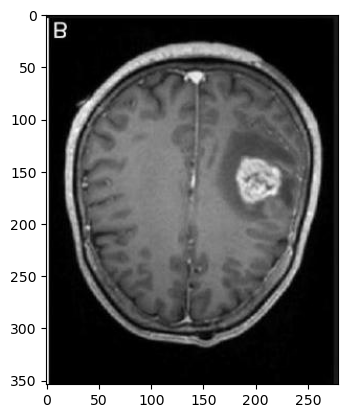

In [19]:

path = r'E:\Machine Learning Project\DMML\datasets\yes\y73.jpg'
raw_img= cv2.imread(path) #read in gray scale format

plt.imshow(raw_img)
plt.show()

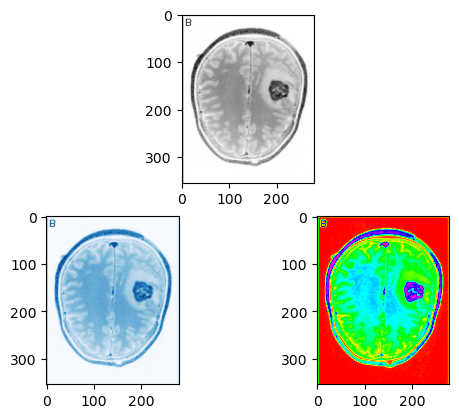

In [20]:
img = img_as_ubyte(io.imread("E:\Machine Learning Project\DMML\datasets\yes\y73.jpg",as_gray=True))
#E:\Machine Learning Project\DMML\datasets\yes\y73.jpg
#E:/Machine Learning Project/DMML/datasets/no/n73.jpg
#E:\Machine Learning Project\DMML\datasets\pred\pred9.jpg
flipUD=np.flipud(img)
plt.subplot(2,1,1) 
plt.imshow(img, cmap="Greys") 
plt.subplot(2,2,3) 
plt.imshow(img, cmap="Blues") 
plt.subplot(2,2,4) 
plt.imshow(img,cmap="hsv")


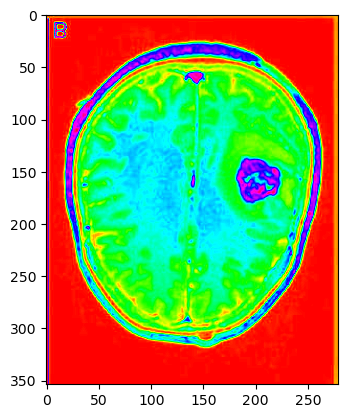

In [21]:
plt.imshow(img,cmap='hsv')
plt.show()

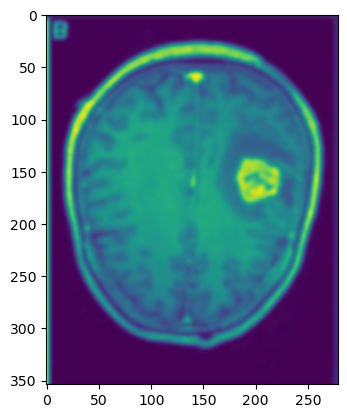

In [22]:
gousian_flt=ndimage.gaussian_filter(img , sigma=2)
plt.imshow(gousian_flt)


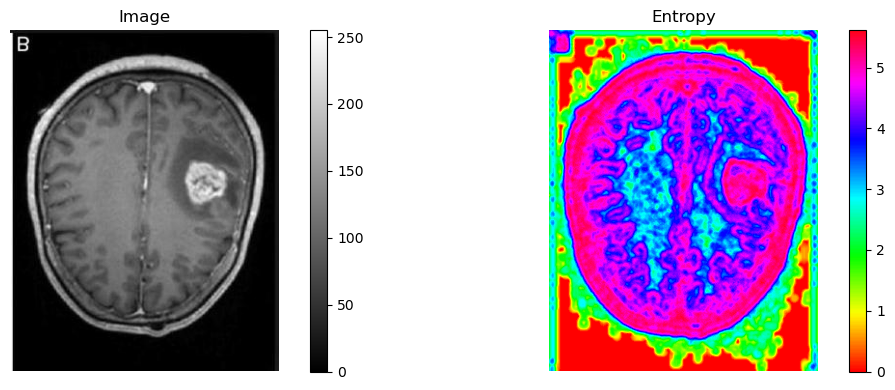

In [23]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 4),
                               sharex=True, sharey=True)
img0 = ax0.imshow(img, cmap=plt.cm.gray)
ax0.set_title("Image")
ax0.axis("off")
fig.colorbar(img0, ax=ax0)

img1 = ax1.imshow(entropy(img, disk(4)), cmap='hsv')
ax1.set_title("Entropy")
ax1.axis("off")
fig.colorbar(img1, ax=ax1)

fig.tight_layout()

plt.show()

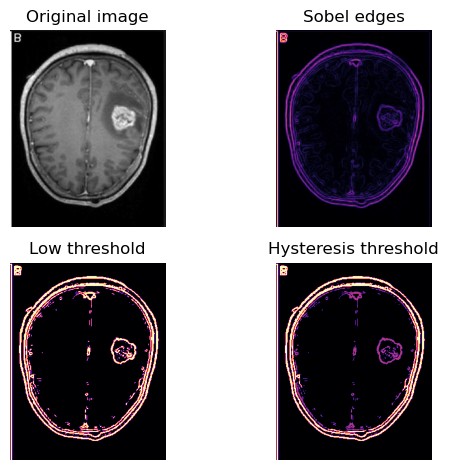

In [24]:
from skimage import data, filters

fig, ax = plt.subplots(nrows=2, ncols=2)
edges = filters.sobel(img)

low = 0.1
high = 0.4

lowt = (edges > low).astype(int)
hight = (edges > high).astype(int)
hyst = filters.apply_hysteresis_threshold(edges, low, high)

ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].set_title('Original image')

ax[0, 1].imshow(edges, cmap='magma')
ax[0, 1].set_title('Sobel edges')

ax[1, 0].imshow(lowt, cmap='magma')
ax[1, 0].set_title('Low threshold')

ax[1, 1].imshow(hyst+lowt, cmap='magma')
ax[1, 1].set_title('Hysteresis threshold')

for a in ax.ravel():
    a.axis('off')

plt.tight_layout()

plt.show()

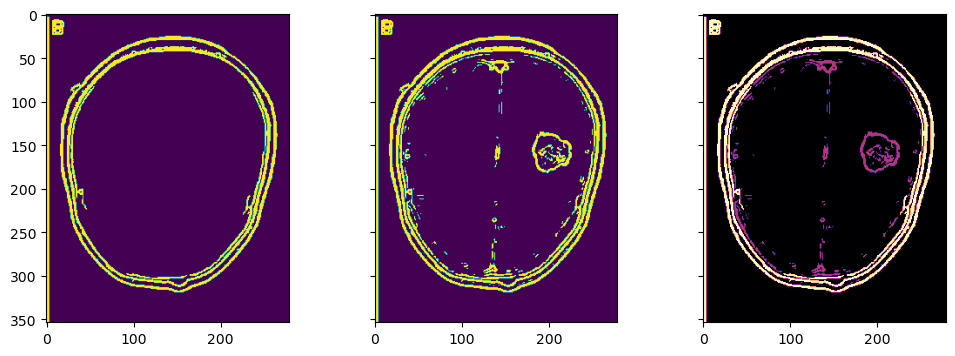

In [25]:
fig, (ax0, ax1,ax2) = plt.subplots(ncols=3, figsize=(12, 4),
                               sharex=True, sharey=True)
img0 = ax0.imshow(hyst)

img1 = ax1.imshow(lowt)


img2 = ax2.imshow(hyst+lowt, cmap='magma')

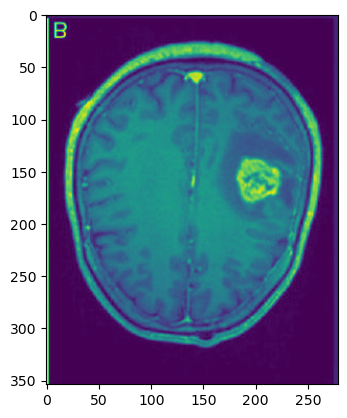

In [26]:
kernel = np.ones((20,20),np.uint8)
ret,thresh1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY)
mask_open = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel)
boarder_open = cv2.bitwise_or( mask_open,img)
new_img=cv2.bitwise_and(boarder_open, img)
plt.imshow(new_img)

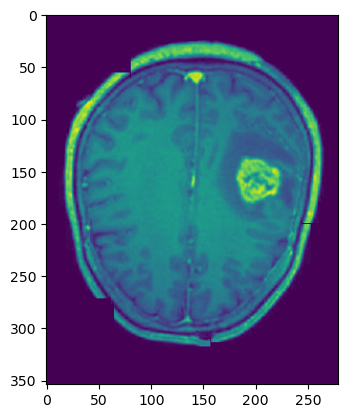

In [27]:
kernel = np.ones((20,20),np.uint8)
ret,thresh1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY)

mask_close = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
boarder_close = cv2.bitwise_and(img, mask_close)


plt.imshow(boarder_close)

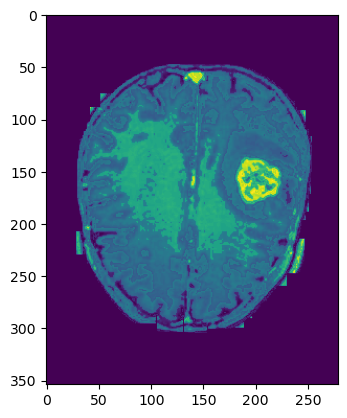

In [28]:
kernel = np.ones((20,20),np.uint8)
ret,thresh1 = cv2.threshold(img,20,220,cv2.THRESH_BINARY)

mask_close = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
boarder_close2 = cv2.bitwise_and(img, mask_close)


plt.imshow(boarder_close2)

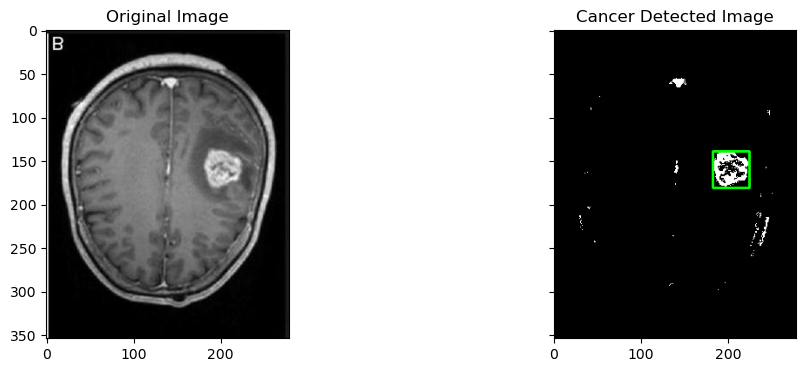

In [29]:

# Create a mask for the cancer-affected areas
cancer_mask = cv2.inRange(boarder_close2, 150, 255)
# Apply bitwise AND operation using the cancer mask
cancer_contour = cv2.bitwise_and(boarder_close2, boarder_close2, mask=cancer_mask)

cancer_contour_pil = Image.fromarray(cv2.cvtColor(cancer_contour, cv2.COLOR_BGR2RGB))

# Apply brightness enhancement
img_brightness_obj = ImageEnhance.Brightness(cancer_contour_pil)
enhanced_img = img_brightness_obj.enhance(8)
new_img_bgr = np.array(enhanced_img)
contours, _ = cv2.findContours(cancer_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Draw a rectangle around the detected area
    imgs=cv2.rectangle(new_img_bgr, (x, y), (x + w, y + h), (0, 255, 0), 2)
# Display the result
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 4),
                                   sharex=True, sharey=True)
img0 = ax0.imshow(img, cmap=plt.cm.gray)
ax0.set_title("Original Image")

img1 = ax1.imshow(imgs)
ax1.set_title("Cancer Detected Image")
plt.show()


In [30]:
print(boarder_close2.shape)


(354, 279)


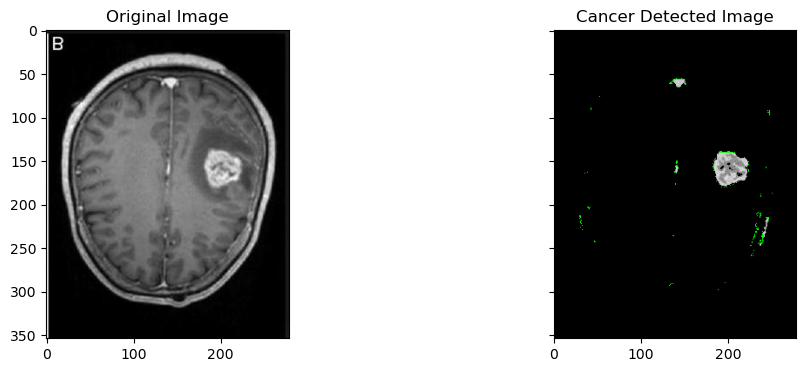

In [31]:
# Create a mask for the cancer-affected areas
#new_img_bgr = np.array(boarder_close2)
new_img_bgr = cv2.cvtColor(boarder_close2, cv2.COLOR_RGB2BGR)

# Color-based segmentation
lower_color = np.array([90, 0, 0], dtype=np.uint8)
upper_color = np.array([255, 255, 255], dtype=np.uint8)
color_mask = cv2.inRange(new_img_bgr, lower_color, upper_color)

# Edge detection using Canny
edges = cv2.Canny(new_img_bgr, 130, 240)

# Contour-based segmentation
gray = cv2.cvtColor(new_img_bgr, cv2.COLOR_BGR2GRAY)
ret, threshold = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_mask = np.zeros_like(threshold)
cv2.drawContours(contour_mask, contours, -1, (255), thickness=cv2.FILLED)

# Combine the masks
#combined_mask = cv2.bitwise_and(color_mask, edges)
combined_mask = cv2.bitwise_and(color_mask, contour_mask)

contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#cancer_contour = cv2.bitwise_or(boarder_close2, boarder_close2, mask=combined_mask)
# Draw rectangles around the detected contours on the original image
for contour in contours:
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(contour)
            # Draw a rectangle around the detected area on the original image
    new_i = cv2.rectangle(new_img_bgr, (x, y), (x + w, y + h), (0, 255, 0), 2)
    imgc = cv2.bitwise_and(new_i, new_i, mask=combined_mask)

    # Display the result
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 4),
                                   sharex=True, sharey=True)
img0 = ax0.imshow(img, cmap=plt.cm.gray)
ax0.set_title("Original Image")

img1 = ax1.imshow(imgc)
ax1.set_title("Cancer Detected Image")
plt.show()


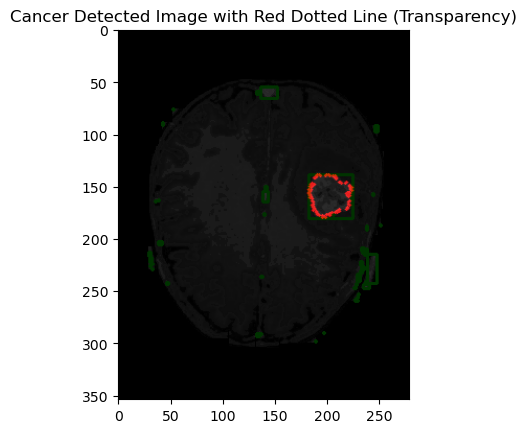

In [32]:
blank_image = np.zeros_like(new_img_bgr, dtype=np.uint8)
alpha = 0.8  # Adjust the transparency level (0: fully transparent, 1: fully opaque)

# Draw the shape of the combined mask on the blank image as a dotted line
cv2.drawContours(blank_image, largest_contour, -1, (255, 0, 0), thickness=2, lineType=cv2.LINE_AA)

# Combine the original image and the blank image with contours using transparency
result_image = cv2.addWeighted(new_img_bgr, 1 - alpha, blank_image, alpha, 0)

# Display the result
plt.imshow(result_image)
plt.title("Cancer Detected Image with Red Dotted Line (Transparency)")
plt.show()

In [33]:
blank_image = np.zeros_like(new_img_bgr)

# Draw rectangles around the selected contours on the blank image
for contour in selected_contours:
    x, y, w, h = cv2.boundingRect(contour)
    # Draw a rectangle on the blank image
    cv2.rectangle(blank_image, (x, y), (x + w, y + h), (0, 255, 0), -1)  # -1 fills the rectangle

# Create a mask for the green areas in the original image
green_mask = cv2.inRange(blank_image, (0, 255, 0), (0, 255, 0))


# Create an image with non-green areas from the original image
result_image = cv2.bitwise_or(new_img_bgr, new_img_bgr, mask=green_mask)

# Display the result
plt.imshow(result_image)
plt.title("Cancer Detected Image with Bounding Boxes")
plt.show()

NameError: name 'selected_contours' is not defined

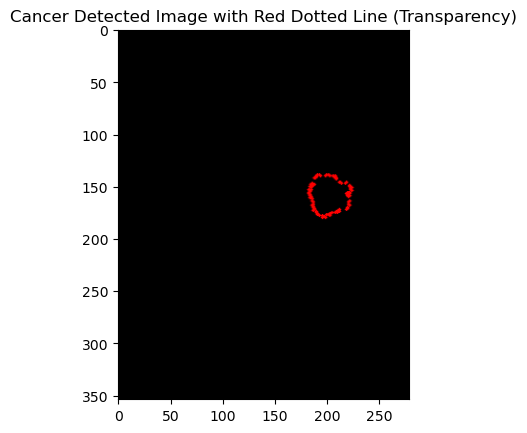

'green_mask = cv2.inRange(blank_image, (0, 255, 0), (0, 255, 0))\n\n# Invert the mask to get the non-green areas\nnon_green_mask = cv2.bitwise_not(green_mask)\n\n# Create an image with non-green areas from the original image\nresult_image = cv2.bitwise_and(new_img_bgr, new_img_bgr, mask=non_green_mask)\n\n# Convert the non-green areas to red\nresult_image[np.where((result_image == [0, 255, 0]).all(axis=2))] = [0, 255,0]\n\n# Display the result\nplt.imshow(result_image)\nplt.title("Cancer Detected Image with Selected Areas in Red")\nplt.show()'

In [34]:
blank_image = np.zeros_like(new_img_bgr)

cv2.drawContours(blank_image, largest_contour, -1, (255, 0, 0), thickness=2, lineType=cv2.LINE_AA)

# Combine the original image and the blank image with contours using transparency
result_image = cv2.addWeighted(new_img_bgr, 0, blank_image, 1, 0)

# Display the result
plt.imshow(result_image)
plt.title("Cancer Detected Image with Red Dotted Line (Transparency)")
plt.show()



In [ ]:
'''green_mask = cv2.inRange(blank_image, (0, 255, 0), (0, 255, 0))

# Invert the mask to get the non-green areas
non_green_mask = cv2.bitwise_not(green_mask)

# Create an image with non-green areas from the original image
result_image = cv2.bitwise_and(new_img_bgr, new_img_bgr, mask=non_green_mask)

# Convert the non-green areas to red
result_image[np.where((result_image == [0, 255, 0]).all(axis=2))] = [0, 255,0]

# Display the result
plt.imshow(result_image)
plt.title("Cancer Detected Image with Selected Areas in Red")
plt.show()'''

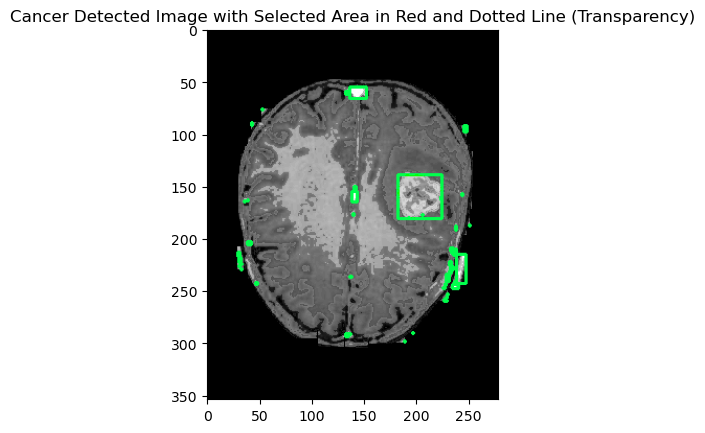

In [35]:
blank_image = np.zeros_like(new_img_bgr)

# Draw contours on the blank image
cv2.drawContours(blank_image, [largest_contour], -1, (0, 255, 0), thickness=cv2.FILLED)

# Create a mask for the green areas in the original image
green_mask = cv2.inRange(blank_image, (0, 255, 0), (0, 255, 0))

# Invert the mask to get the non-green areas
non_green_mask = cv2.bitwise_not(green_mask)

# Create an image with non-green areas from the original image
result_image = cv2.bitwise_and(new_img_bgr, new_img_bgr, mask=non_green_mask)

# Convert the non-green areas to red
result_image[np.where((result_image == [0, 255, 0]).all(axis=2))] = [0, 0, 255]

# Combine the original image and the result using transparency
result_image = cv2.addWeighted(new_img_bgr, 1, result_image, 0.3, 0)

# Display the result
plt.imshow(result_image)
plt.title("Cancer Detected Image with Selected Area in Red and Dotted Line (Transparency)")
plt.show()


In [46]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

import cv2
from tqdm import tqdm_notebook, tnrange
from glob import glob
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from sklearn.model_selection import train_test_split

import tensorflow as tf
from skimage.color import rgb2gray
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import torch
import torchvision.models as models
 

In [47]:
import os
import zipfile
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from sklearn.model_selection import train_test_split

DataPath = "E:/Machine Learning Project/DMML/brats_dataset/kaggle_3m/"

dirs = []
images = []
masks = []
for dirname, _, filenames in os.walk(DataPath):
    for filename in filenames:
        if 'mask'in filename:
            dirs.append(dirname.replace(DataPath, ''))
            masks.append(filename)
            images.append(filename.replace('_mask', ''))
# Define the U-Net model

In [48]:
imagePath_df = pd.DataFrame({'directory':dirs, 'images': images, 'masks': masks})

In [49]:
def plot_images():
    idx = np.random.randint(0, len(imagePath_df))
    
    imagePath = os.path.join(DataPath, imagePath_df['directory'].iloc[idx], imagePath_df['images'].iloc[idx])
    maskPath = os.path.join(DataPath, imagePath_df['directory'].iloc[idx], imagePath_df['masks'].iloc[idx])
    
    image = cv2.imread(imagePath)
    mask = cv2.imread(maskPath)
    
    fig, axs = plt.subplots(1,3, figsize=[13,15])
    
    axs[0].imshow(image)
    axs[0].set_title('Brain MRI')
    
    axs[1].imshow(mask)
    axs[1].set_title('Mask')
    
    axs[2].imshow(image)
    axs[2].imshow(mask, alpha=0.3)
    axs[2].set_title('MRI with mask')
    
    plt.grid(False)
    plt.show()

In [50]:
imagePath_df['image-path'] = DataPath + imagePath_df['directory'] + '/' + imagePath_df['images']
imagePath_df['mask-path'] = DataPath + imagePath_df['directory'] + '/' + imagePath_df['masks'] 

In [51]:
train , test = train_test_split(imagePath_df, test_size=0.25, random_state=21)

In [52]:
EPOCHS = 10
BATCH_SIZE = 32
ImgHieght = 256
ImgWidth = 256
Channels = 3

In [53]:
data_augmentation = dict(rotation_range=0.2,
                        width_shift_range=0.05,
                        height_shift_range=0.05,
                        shear_range=0.05,
                        zoom_range=0.05,
                        horizontal_flip=True,
                        fill_mode='nearest')

In [54]:
# image generator
imagegen = ImageDataGenerator(rescale=1./255., **data_augmentation)
maskgen = ImageDataGenerator(rescale=1./255., **data_augmentation)


# train generator
timage_generator=imagegen.flow_from_dataframe(dataframe=train,
                                            x_col="image-path",
                                            batch_size= BATCH_SIZE,
                                            seed=42,
                                            class_mode=None,
                                            target_size=(ImgHieght,ImgWidth),
                                            color_mode='rgb')
# validation data generator
tmask_generator=maskgen.flow_from_dataframe(dataframe=train,
                                            x_col="mask-path",
                                            batch_size=BATCH_SIZE,
                                            seed=42,
                                            class_mode=None,
                                            target_size=(ImgHieght,ImgWidth),
                                            color_mode='grayscale')  

Found 2946 validated image filenames.
Found 2946 validated image filenames.


In [55]:
# image generator
imagegen = ImageDataGenerator(rescale=1./255.)
maskgen = ImageDataGenerator(rescale=1./255.)


# train generator
vimage_generator=imagegen.flow_from_dataframe(dataframe=test,
                                            x_col="image-path",
                                            batch_size= BATCH_SIZE,
                                            seed=42,
                                            class_mode=None,
                                            target_size=(ImgHieght,ImgWidth),
                                            color_mode='rgb')
# validation data generator
vmask_generator=maskgen.flow_from_dataframe(dataframe=test,
                                            x_col="mask-path",
                                            batch_size=BATCH_SIZE,
                                            seed=42,
                                            class_mode=None,
                                            target_size=(ImgHieght,ImgWidth),
                                            color_mode='grayscale')  

Found 983 validated image filenames.
Found 983 validated image filenames.


In [56]:
def data_iterator(image_gen, mask_gen):
    for img, mask in zip(image_gen, mask_gen):
        yield img, mask

In [57]:
train_gen = data_iterator(timage_generator, tmask_generator)
valid_gen = data_iterator(vimage_generator, vmask_generator)

In [58]:
def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
    """Function to add 2 convolutional layers with the parameters passed to it"""
    # first layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # second layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x

In [59]:
def get_unet(input_img, n_filters = 16, dropout = 0.1, batchnorm = True):
    """Function to define the UNET Model"""
    # Contracting Path
    c1 = conv2d_block(input_img, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)
    
    c2 = conv2d_block(p1, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)
    
    c3 = conv2d_block(p2, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)
    
    c4 = conv2d_block(p3, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters = n_filters * 16, kernel_size = 3, batchnorm = batchnorm)
    
    # Expansive Path
    u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    
    u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    
    u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    
    u9 = Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

In [60]:
input_img = Input((ImgHieght, ImgWidth, 3), name='img')
model = get_unet(input_img, n_filters=16, dropout=0.2, batchnorm=True)
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

In [61]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         448       ['img[0][0]']                 
                                                                                                  
 batch_normalization_1 (Bat  (None, 256, 256, 16)         64        ['conv2d_1[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 activation_1 (Activation)   (None, 256, 256, 16)         0         ['batch_normalization_1[0]

                                                                                                  
 concatenate_1 (Concatenate  (None, 64, 64, 128)          0         ['conv2d_transpose_1[0][0]',  
 )                                                                   'activation_5[0][0]']        
                                                                                                  
 dropout_5 (Dropout)         (None, 64, 64, 128)          0         ['concatenate_1[0][0]']       
                                                                                                  
 conv2d_13 (Conv2D)          (None, 64, 64, 64)           73792     ['dropout_5[0][0]']           
                                                                                                  
 batch_normalization_13 (Ba  (None, 64, 64, 64)           256       ['conv2d_13[0][0]']           
 tchNormalization)                                                                                
          

In [62]:
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=1e-5, verbose=1),
    ModelCheckpoint('model-brain-mri.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [63]:
STEP_SIZE_TRAIN = timage_generator.n/BATCH_SIZE
STEP_SIZE_VALID = vimage_generator.n/BATCH_SIZE

In [64]:
import torch
 
print(torch.cuda.is_available())

False


In [65]:
results = model.fit(train_gen,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=callbacks,
                    validation_data=valid_gen,
                   validation_steps=STEP_SIZE_VALID)

Epoch 1/10
93/92 [==============================] - ETA: -7s - loss: 0.2593 - accuracy: 0.9657
Epoch 1: val_loss improved from inf to 0.22556, saving model to model-brain-mri.h5
92/92 [==============================] - 753s 8s/step - loss: 0.2593 - accuracy: 0.9657 - val_loss: 0.2256 - val_accuracy: 0.9905 - lr: 0.0010
Epoch 2/10
93/92 [==============================] - ETA: -6s - loss: 0.1113 - accuracy: 0.9887
Epoch 2: val_loss improved from 0.22556 to 0.11082, saving model to model-brain-mri.h5
92/92 [==============================] - 637s 7s/step - loss: 0.1113 - accuracy: 0.9887 - val_loss: 0.1108 - val_accuracy: 0.9908 - lr: 0.0010
Epoch 3/10
93/92 [==============================] - ETA: -5s - loss: 0.0698 - accuracy: 0.9900
Epoch 3: val_loss improved from 0.11082 to 0.06348, saving model to model-brain-mri.h5
92/92 [==============================] - 572s 6s/step - loss: 0.0698 - accuracy: 0.9900 - val_loss: 0.0635 - val_accuracy: 0.9911 - lr: 0.0010
Epoch 4/10
93/92 [===========

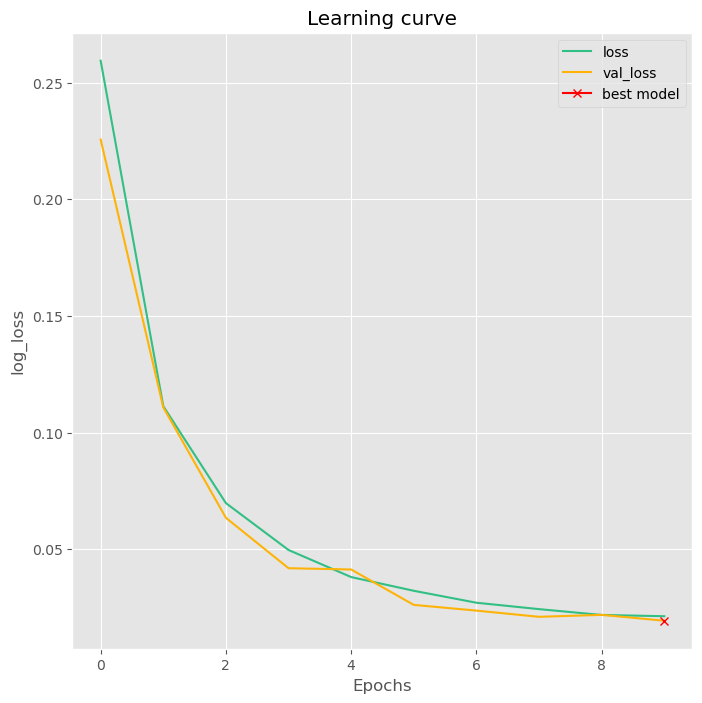

In [66]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss", color=sns.xkcd_rgb['greenish teal'])
plt.plot(results.history["val_loss"], label="val_loss", color=sns.xkcd_rgb['amber'])
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend()
# plt.grid(False)
plt.show()

In [67]:
# load the best model
model.load_weights('model-brain-mri.h5')

In [68]:
eval_results = model.evaluate(valid_gen, steps=STEP_SIZE_VALID, verbose=1)

30/30 [==============================] - 33s 1s/step - loss: 0.0184 - accuracy: 0.9950


1/1 [==============================] - 1s 850ms/step


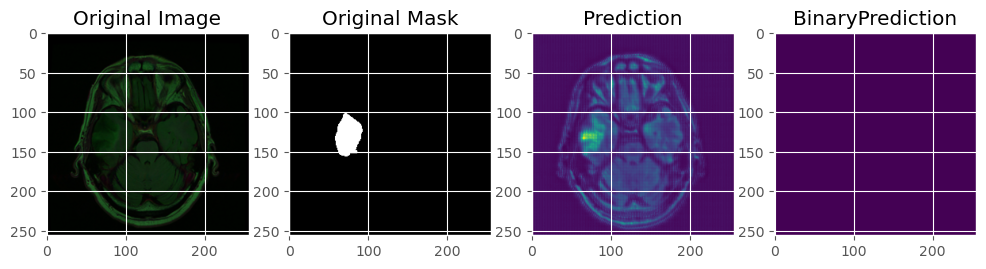

1/1 [==============================] - 0s 67ms/step


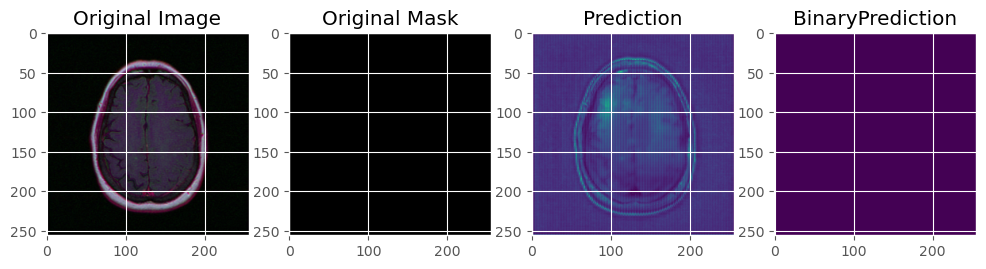

1/1 [==============================] - 0s 71ms/step


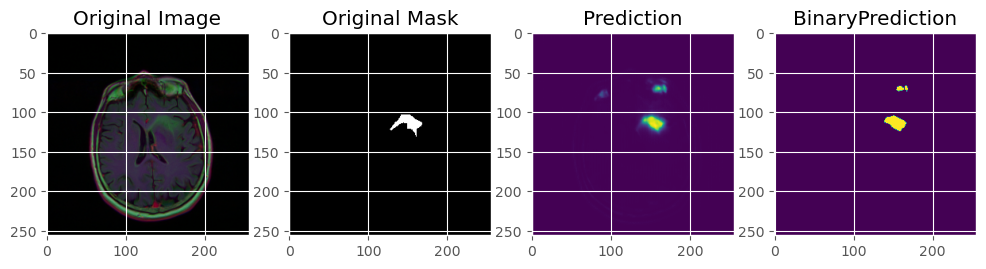

1/1 [==============================] - 0s 77ms/step


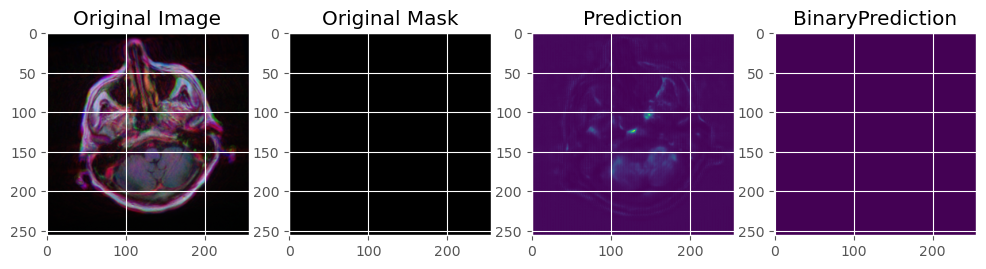

1/1 [==============================] - 0s 69ms/step


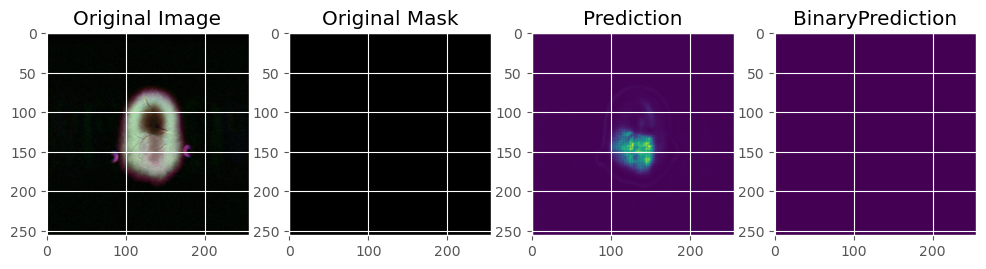

1/1 [==============================] - 0s 77ms/step


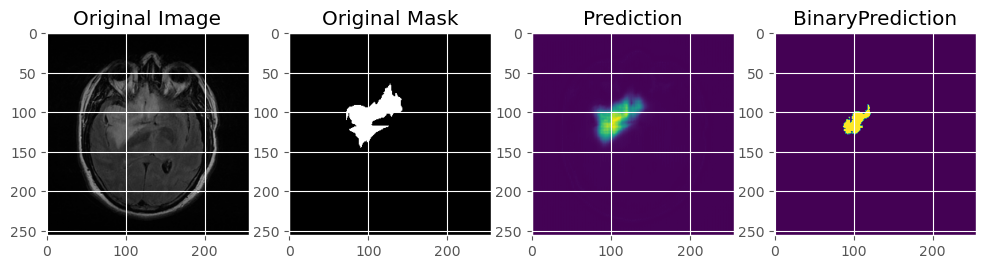

1/1 [==============================] - 0s 74ms/step


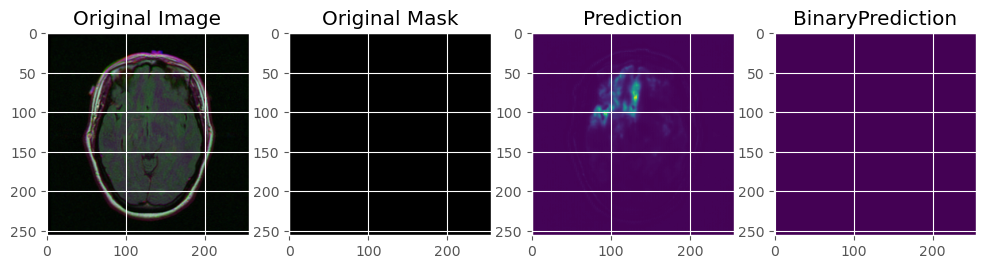

1/1 [==============================] - 0s 68ms/step


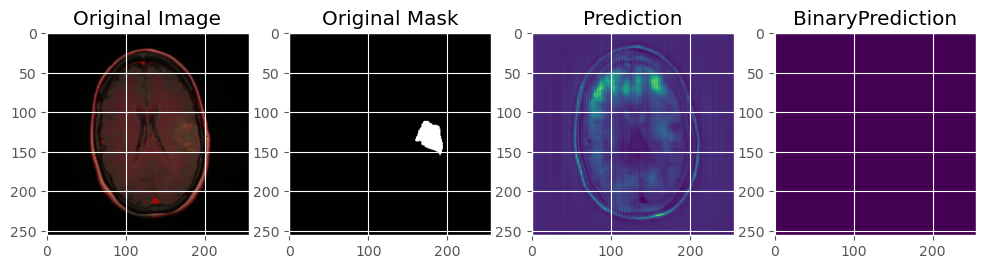

1/1 [==============================] - 0s 68ms/step


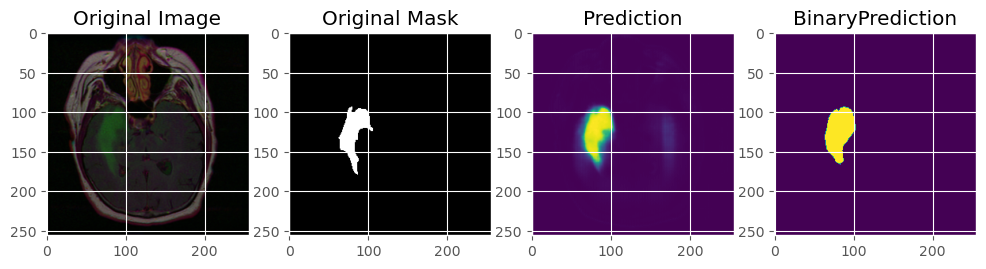

1/1 [==============================] - 0s 66ms/step


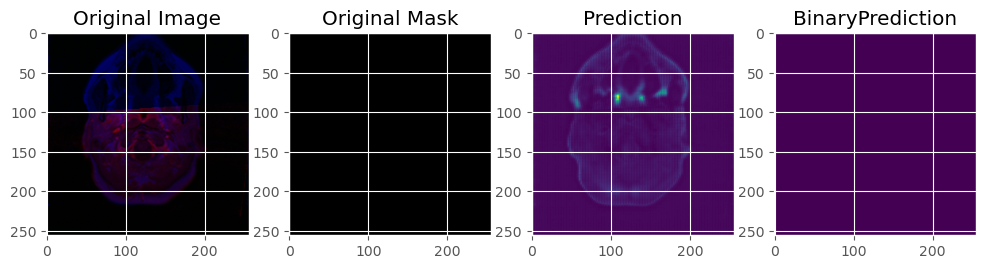

In [69]:
for i in range(10):
    idx = np.random.randint(0, len(imagePath_df))
    
    imagePath = os.path.join(DataPath, imagePath_df['directory'].iloc[idx], imagePath_df['images'].iloc[idx])
    maskPath = os.path.join(DataPath, imagePath_df['directory'].iloc[idx], imagePath_df['masks'].iloc[idx])
    
    image = cv2.imread(imagePath)
    mask = cv2.imread(maskPath)
    
    img = cv2.resize(image ,(ImgHieght, ImgWidth))
    img = img / 255
    img = img[np.newaxis, :, :, :]
    pred=model.predict(img)

    plt.figure(figsize=(12,12))
    plt.subplot(1,4,1)
    plt.imshow(np.squeeze(img))
    plt.title('Original Image')
    plt.subplot(1,4,2)
    plt.imshow(mask)
    plt.title('Original Mask')
    plt.subplot(1,4,3)
    plt.imshow(np.squeeze(pred))
    plt.title('Prediction')
    plt.subplot(1,4,4)
    plt.imshow(np.squeeze(pred) > 0.40)
    plt.title('BinaryPrediction')
    plt.show()

1/1 [==============================] - 0s 75ms/step


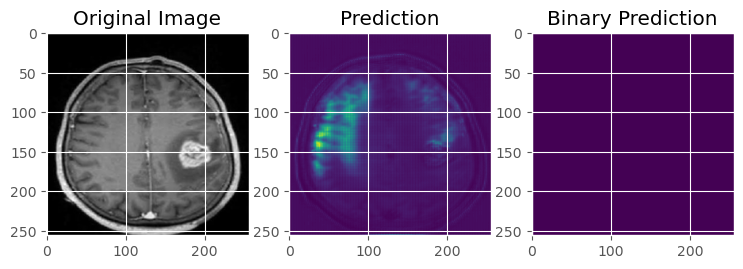

In [73]:
image_path = "E:/Machine Learning Project/DMML/datasets/pred8.tiff"
image = cv2.imread(image_path)
img = cv2.resize(image, (256, 256))
img = img / 255
img = img[np.newaxis, :, :, :]  
#img = np.expand_dims(img, axis=0)

pred = model.predict(img)

plt.figure(figsize=(12, 12))
plt.subplot(1, 4, 1)
plt.imshow(np.squeeze(img))
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(pred.squeeze())  # Ensure values in pred are within [0, 1]
plt.title('Prediction')

plt.subplot(1, 4, 3)
plt.imshow(pred.squeeze() > 0.5)  # Ensure values in pred are within [0, 1]
plt.title('Binary Prediction')

plt.show()


In [82]:
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import to_categorical

image_directory='datasets/'

no_tumor_images=os.listdir(image_directory+ 'no/')
yes_tumor_images=os.listdir(image_directory+ 'yes/')
dataset=[]
label=[]

INPUT_SIZE=64
# print(no_tumor_images)

# path='no0.jpg'

# print(path.split('.')[1])

for i , image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'no/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

for i , image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'yes/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

dataset=np.array(dataset)
label=np.array(label)


x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.2, random_state=0)

# Reshape = (n, image_width, image_height, n_channel)

# print(x_train.shape)
# print(y_train.shape)

# print(x_test.shape)
# print(y_test.shape)

x_train=normalize(x_train, axis=1)
x_test=normalize(x_test, axis=1)

y_train=to_categorical(y_train , num_classes=2)
y_test=to_categorical(y_test , num_classes=2)



# Model Building
# 64,64,3

model=Sequential()

model.add(Conv2D(32, (3,3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))


# Binary CrossEntropy= 1, sigmoid
# Categorical Cross Entryopy= 2 , softmax

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])


model.fit(x_train, y_train, 
batch_size=16, 
verbose=1, epochs=10, 
validation_data=(x_test, y_test),
shuffle=False)


model.save('BrainTumor10EpochsCategorical.h5')







Epoch 1/10
150/150 [==============================] - 6s 38ms/step - loss: 0.5626 - accuracy: 0.7221 - val_loss: 0.4449 - val_accuracy: 0.7800
Epoch 2/10
150/150 [==============================] - 5s 35ms/step - loss: 0.4177 - accuracy: 0.8233 - val_loss: 0.3743 - val_accuracy: 0.8233
Epoch 3/10
150/150 [==============================] - 5s 36ms/step - loss: 0.3287 - accuracy: 0.8546 - val_loss: 0.3711 - val_accuracy: 0.8367
Epoch 4/10
150/150 [==============================] - 5s 36ms/step - loss: 0.2654 - accuracy: 0.8925 - val_loss: 0.2553 - val_accuracy: 0.8850
Epoch 5/10
150/150 [==============================] - 6s 38ms/step - loss: 0.2039 - accuracy: 0.9229 - val_loss: 0.1873 - val_accuracy: 0.9317
Epoch 6/10
150/150 [==============================] - 6s 40ms/step - loss: 0.1539 - accuracy: 0.9471 - val_loss: 0.1853 - val_accuracy: 0.9417
Epoch 7/10
150/150 [==============================] - 6s 42ms/step - loss: 0.1182 - accuracy: 0.9604 - val_loss: 0.1411 - val_accuracy: 0.9500

C:\Users\ishti\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [86]:
model=load_model('E:\Machine Learning Project\DMML\BrainTumor10EpochsCategorical.h5')

image=cv2.imread('E:\Machine Learning Project\DMML\datasets\pred\pred7.jpg')

img=Image.fromarray(image)

img=img.resize((64,64))

img=np.array(img)

input_img=np.expand_dims(img, axis=0)

result=model.predict_classes(input_img)
print(result)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [74]:
import cv2
import os
from PIL import Image
import tensorflow as tf
from tensorflow import _keras
import numpy as np
from keras.utils import normalize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D
from keras.layers import Activation,Dropout,Flatten
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

image_directory='datasets/'

no_tumor_img=os.listdir(image_directory+'no/')
yes_tumor_img=os.listdir(image_directory+'yes/')


In [75]:

dataset=[]
lable=[]

INput_size=64
for i, image_name in enumerate(no_tumor_img):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'no/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((INput_size,INput_size))
        dataset.append(np.array(image))
        lable.append(0)
for i, image_name in enumerate(yes_tumor_img):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'yes/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((INput_size,INput_size))
        dataset.append(np.array(image))
        lable.append(1)

dataset=np.array(dataset)
lable=np.array(lable)



In [76]:


x_train,x_test,y_train,y_test=train_test_split(dataset,lable,test_size=0.25,random_state=46)

#reshape= (n,image_width,image_height,n_channel)
print(x_train.shape)

print(len(dataset))
print(len(lable))

x_train=normalize(x_train,axis=1)
x_test=normalize(x_test,axis=1)


(2250, 64, 64, 3)
3000
3000


In [77]:
# Function for Morphological Operation
def apply_morphological_operation(image):
    # Apply morphological operations (e.g., dilation, erosion) here
    kernel = np.ones((20, 20), np.uint8)
    ret, thresh1 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY)
    mask_open = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
    result_image = cv2.bitwise_and(image, mask_open)
    return result_image

In [78]:

x_train_processed = np.array([apply_morphological_operation(img) for img in x_train])
x_test_processed = np.array([apply_morphological_operation(img) for img in x_test])

# Normalize pixel values to be between 0 and 1
x_train_processed = x_train_processed / 255.0
x_test_processed = x_test_processed / 255.0

In [81]:
dataset=[]
label=[]

INPUT_SIZE=64
# print(no_tumor_images)

# path='no0.jpg'

# print(path.split('.')[1])



x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.2, random_state=0)

# Reshape = (n, image_width, image_height, n_channel)

# print(x_train.shape)
# print(y_train.shape)

# print(x_test.shape)
# print(y_test.shape)

x_train=normalize(x_train, axis=1)
x_test=normalize(x_test, axis=1)

y_train=to_categorical(y_train , num_classes=2)
y_test=to_categorical(y_test , num_classes=2)



# Model Building
# 64,64,3

model=Sequential()

model.add(Conv2D(32, (3,3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))


# Binary CrossEntropy= 1, sigmoid
# Categorical Cross Entryopy= 2 , softmax

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])


model.fit(x_train, y_train, 
batch_size=16, 
verbose=1, epochs=10, 
validation_data=(x_test, y_test),
shuffle=False)


model.save('BrainTumor10EpochsCategorical.h5')



ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [84]:
import json
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Load annotation file
with open('E:\Machine Learning Project\DMML\datasets\Br35H-Mask-RCNN\TRAIN\annotations_train.json', 'r') as f:
    annotations = json.load(f)

# Extract information from annotations
images = []
labels = []

for annotation in annotations:
    # Assuming annotation contains 'filename', 'bbox', and 'label' fields
    filename = annotation['filename']
    bbox = annotation['bbox']
    label = annotation['label']

    # Load and preprocess the image
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # If using OpenCV, convert from BGR to RGB
    img = apply_morphological_operation(img)  # Apply your morphological operation

    # Extract the region of interest (ROI) based on the bounding box
    x, y, w, h = bbox
    roi = img[y:y+h, x:x+w]

    # Resize the image to your desired input size
    roi = cv2.resize(roi, (INPUT_SIZE, INPUT_SIZE))

    images.append(roi)
    labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize pixel values to be between 0 and 1
images = images / 255.0

# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=0)

# Further preprocessing if needed
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

# Convert labels to categorical format
y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = to_categorical(y_test, num_classes=NUM_CLASSES)

OSError: [Errno 22] Invalid argument: 'E:\\Machine Learning Project\\DMML\\datasets\\Br35H-Mask-RCNN\\TRAIN\x07nnotations_train.json'